In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [6]:
try : 
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he :
        print('http error')
except URLError as ue :
        print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [8]:
soup


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [9]:
base_table = soup.find('table', {'class' : 'tData01 tt'})
base_table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [17]:
player_list = []
avg_list = []
h_list = []
hr_list = []
rbi_list = []
data = []
for tr in base_table.find_all('tr'):
    tds = list(tr.find_all('td'))
    for td in tds :
        if td.find('a'):
            player = td.find('a').text
            player_list.append(player)
            avg = tds[3].text
            avg_list.append(avg)
            h = tds[8].text
            h_list.append(h)
            hr = tds[11].text
            hr_list.append(hr)
            rbi = tds[13].text
            rbi_list.append(rbi)
data.append([player_list,avg_list,h_list,hr_list,rbi_list])
print(data)

[[['페르난데스', '김현수', '손아섭', '이정후', '박민우', '최형우', '로하스', '양의지', '나성범', '허경민', '이명기', '강백호', '정훈', '구자욱', '김상수', '황재균', '오재일', '최주환', '배정대', '김하성', '터커', '박해민', '조용호', '정수빈', '박건우', '나지완', '알테어', '박석민', '마차도', '전준우'], ['0.355', '0.352', '0.350', '0.347', '0.345', '0.344', '0.344', '0.328', '0.327', '0.324', '0.318', '0.315', '0.312', '0.312', '0.312', '0.311', '0.307', '0.306', '0.302', '0.302', '0.301', '0.299', '0.297', '0.295', '0.294', '0.291', '0.291', '0.290', '0.290', '0.289'], ['173', '161', '150', '165', '128', '144', '157', '120', '134', '110', '123', '123', '99', '113', '111', '132', '118', '130', '130', '140', '130', '115', '95', '120', '126', '112', '114', '89', '119', '133'], ['18', '21', '8', '15', '4', '17', '37', '23', '29', '6', '2', '18', '9', '11', '4', '15', '14', '12', '13', '27', '29', '8', '0', '3', '12', '15', '25', '11', '10', '20'], ['87', '107', '67', '97', '49', '80', '108', '100', '96', '44', '43', '68', '49', '60', '41', '75', '70', '70', '58', '98', '93', '4

In [19]:
import pandas as pd

In [22]:
baseball_df = pd.DataFrame({
    'player' : player_list,
    'avg' : avg_list,
    'h' : h_list,
    'hr' : hr_list,
    'rbi' : rbi_list
})
baseball_df

,player,avg,h,hr,rbi
0,페르난데스,0.355,173,18,87
1,김현수,0.352,161,21,107
2,손아섭,0.350,150,8,67
3,이정후,0.347,165,15,97
4,박민우,0.345,128,4,49
5,최형우,0.344,144,17,80
6,로하스,0.344,157,37,108
7,양의지,0.328,120,23,100
8,나성범,0.327,134,29,96
9,허경민,0.324,110,6,44


In [24]:
baseball_df.to_csv('baseball_df.csv', mode='w', encoding='utf-8')
print('good')

good


In [25]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('./baseball_df.csv', index_col='player', encoding='utf-8')
df

,Unnamed: 0,avg,h,hr,rbi
player,,,,,
페르난데스,0,0.355,173,18,87
김현수,1,0.352,161,21,107
손아섭,2,0.350,150,8,67
이정후,3,0.347,165,15,97
박민우,4,0.345,128,4,49
최형우,5,0.344,144,17,80
로하스,6,0.344,157,37,108
양의지,7,0.328,120,23,100
나성범,8,0.327,134,29,96


In [28]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


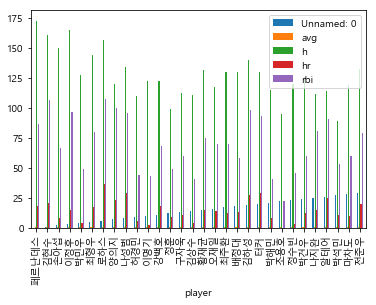

In [29]:
df.plot.bar()